In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import pylab as pl
import statsmodels.formula.api as sm
import statsmodels.api as sf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
##using citibike feb 2015 data url https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip
data = pd.read_csv('tripdata.csv')

In [5]:
data['tripduration'] = data['tripduration']/60  ## converting the time to minutes

In [6]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,13.350000,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2
1,6.316667,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1
2,41.233333,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2
3,13.633333,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2
4,9.066667,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1


In [7]:
data_b = data[(data.gender==1)]  # to get the male data


In [8]:
n = data_b['gender'].groupby(data_b['birth year']).count()  ## to number of males in this age bracket

In [9]:
y = data_b['tripduration'].groupby(data_b['birth year']).sum()

In [10]:
y=log(y)

In [11]:
data_f = pd.concat([n,y], axis=1)

In [12]:
data_f = data_f.reset_index()  ## this is to reset the index


In [13]:
data_f.head()

,birth year,0,tripduration
0,1899,2,3.943199
1,1900,82,7.322643
2,1901,9,5.207389
3,1910,2,4.012773
4,1922,12,4.561044


In [14]:
data_f.columns


Index([u'birth year', 0, u'tripduration'], dtype='object')

In [15]:
data_f=data_f.rename(columns={0:'Count','birth year' : 'birth_year'})

In [16]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 3 columns):
birth_year      74 non-null float64
Count           74 non-null int64
tripduration    74 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.3 KB


In [17]:
x=data_f['birth_year']
z=data_f['Count']
y=data_f['tripduration']

In [18]:
x.max(),x.min(),y.max(),y.min(),z.max(),z.min()

(1999.0, 1899.0, 11.024219227185771, 2.1972245773362196, 6176, 1)

In [19]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


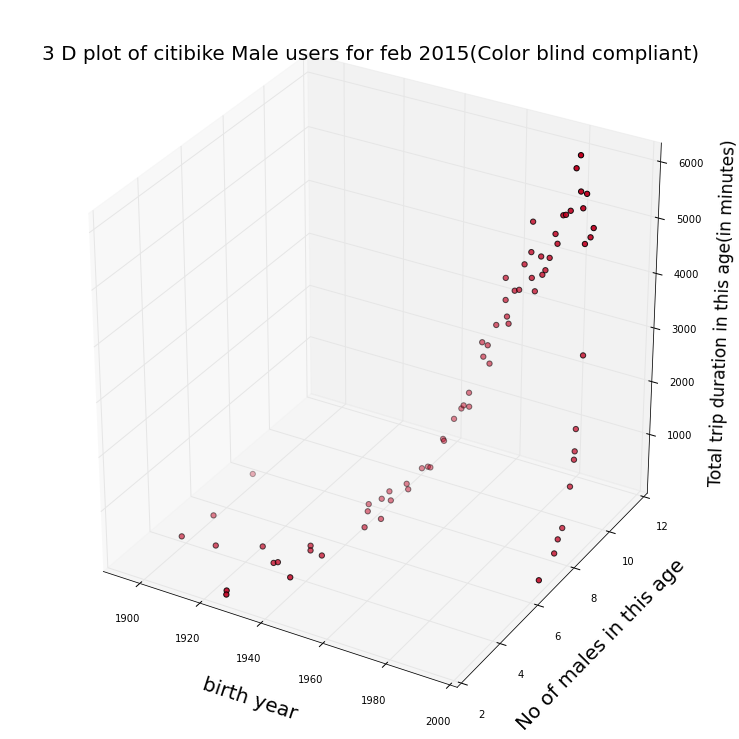

In [20]:
#plotting the graph

fig = pl.figure(figsize=(13,13))

ax = pl.axes(projection='3d')
plt.title('3 D plot of citibike Male users for feb 2015(Color blind compliant)', fontsize=20)
#ax.scatter(x,y)
ax.set_xlim(1890,2000)
ax.set_ylim(2,12)
ax.set_zlim(1,6200)
ax.set_color_cycle(kelly_colors_hex)  ## choosing from the color blind 
ax.scatter(x, y, z,depthshade = True,c=kelly_colors_hex[4],s=28)
ax.grid()
ax.set_xlabel('birth year', fontsize=20)
ax.set_ylabel('No of males in this age ', fontsize=20)
ax.set_zlabel('Total trip duration in this age(in minutes)',fontsize=17)
pl.savefig('plot_male.png')


In [21]:
data_g = data[data.gender==2]   ##  to get the female data

In [22]:
n = data_g['gender'].groupby(data_g['birth year']).count()

In [23]:
y = data_g['tripduration'].groupby(data_g['birth year']).sum()


In [24]:
y=log(y)

In [25]:
data_f = pd.concat([n,y], axis=1)

In [26]:
data_f = data_f.reset_index()

In [27]:
data_f=data_f.rename(columns={0:'Count','birth year' : 'birth_year'})

In [28]:
x=data_f['birth_year']
z=data_f['Count']
y=data_f['tripduration']

In [29]:
x.max(),x.min(),y.max(),y.min(),z.max(),z.min()

(1998.0, 1900.0, 9.770218982513576, 1.8536904269585455, 1513, 1)

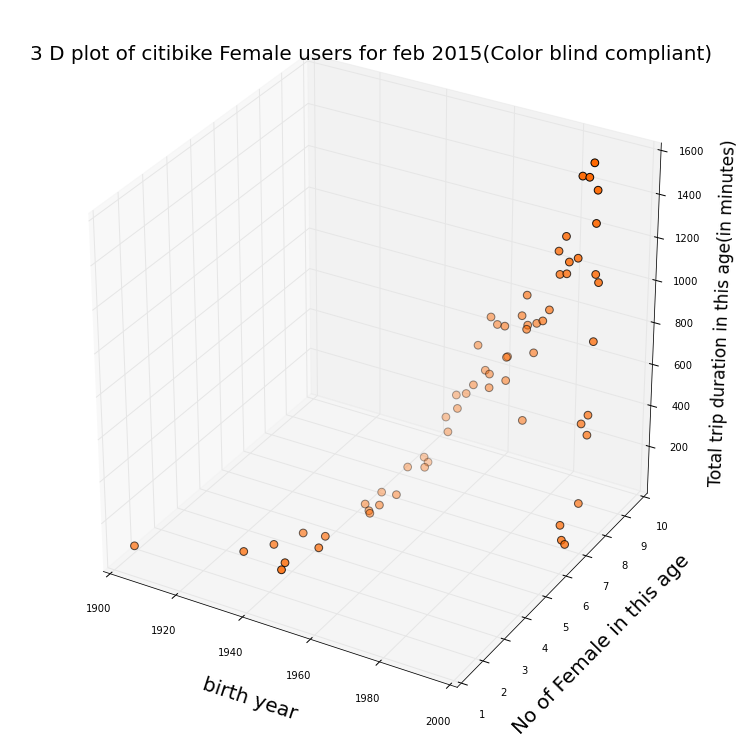

In [31]:
fig = pl.figure(figsize=(13,13))

ax = pl.axes(projection='3d')
plt.title('3 D plot of citibike Female users for feb 2015(Color blind compliant)', fontsize=20)
#ax.scatter(x,y)
ax.set_xlim(1900,2000)
ax.set_ylim(1,10)
ax.set_zlim(1,1600)
ax.set_color_cycle(kelly_colors_hex)  ## choosing from the color blind 
ax.scatter(x, y, z,depthshade = True,c=kelly_colors_hex[2],s=60)
ax.grid()
ax.set_xlabel('birth year', fontsize=20)
ax.set_ylabel('No of Female in this age ', fontsize=20)
ax.set_zlabel('Total trip duration in this age(in minutes)',fontsize=17)
pl.savefig('plot_female.png')